In [ ]:
# ALL TRAINING DONE ON GOOGLE COLAB
import os
import glob
from IPython.display import Image, display
from IPython import display
display.clear_output()

In [ ]:
!nvidia-smi

Thu Nov 21 03:25:45 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics==8.0.196

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 27.8 MB/s eta 0:00:00


In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.5/112.6 GB disk)


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

/content/datasets


In [ ]:
!unzip person.zip

Archive:  person.zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
  inflating: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/people_mp4-0004_jpg.rf.513995f9e43fe702cd12d8df91c34cfe.jpg  
 extracting: test/images/people_mp4-0034_jpg.rf.b9403118fb97b0c03c8c20902578bd4d.jpg  
 extracting: test/images/people_mp4-0051_jpg.rf.5e5413fae8c2d00438da7fbd303fd9b7.jpg  
 extracting: test/images/people_mp4-0052_jpg.rf.992e2eb59ffb94ae5044bf7dab576465.jpg  
 extracting: test/images/people_mp4-0069_jpg.rf.f1408ca7e98db5d9ffec19236a19c6eb.jpg  
 extracting: test/images/people_mp4-0073_jpg.rf.06853de610b3141849a5f1c602749cd9.jpg  
 extracting: test/images/people_mp4-0078_jpg.rf.57543805379d22df2d10faaa1a827939.jpg  
 extracting: test/images/people_mp4-0104_jpg.rf.447c96aad7ebacd1f204b4faa4cb1803.jpg  
 extracting: test/images/people_mp4-0122_jpg.rf.2ad7dc955d04cba17fbc18ecd0313a70.jpg  
 extracting: test/images/people_mp4-0

In [ ]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8n.pt data=/content/datasets/data.yaml epochs=20 imgsz=640 --patience=5

/content
WARNING ⚠️ '--patience=5' does not require leading dashes '--', updating to 'patience=5'.
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues

In [ ]:
!ls runs/detect/train3

args.yaml					    PR_curve.png	train_batch771.jpg
confusion_matrix_normalized.png			    R_curve.png		train_batch772.jpg
confusion_matrix.png				    results.csv		val_batch0_labels.jpg
events.out.tfevents.1732160464.62e9e168a5e9.4568.0  results.png		val_batch0_pred.jpg
F1_curve.png					    train_batch0.jpg	val_batch1_labels.jpg
labels_correlogram.jpg				    train_batch1.jpg	val_batch1_pred.jpg
labels.jpg					    train_batch2.jpg	weights
P_curve.png					    train_batch770.jpg


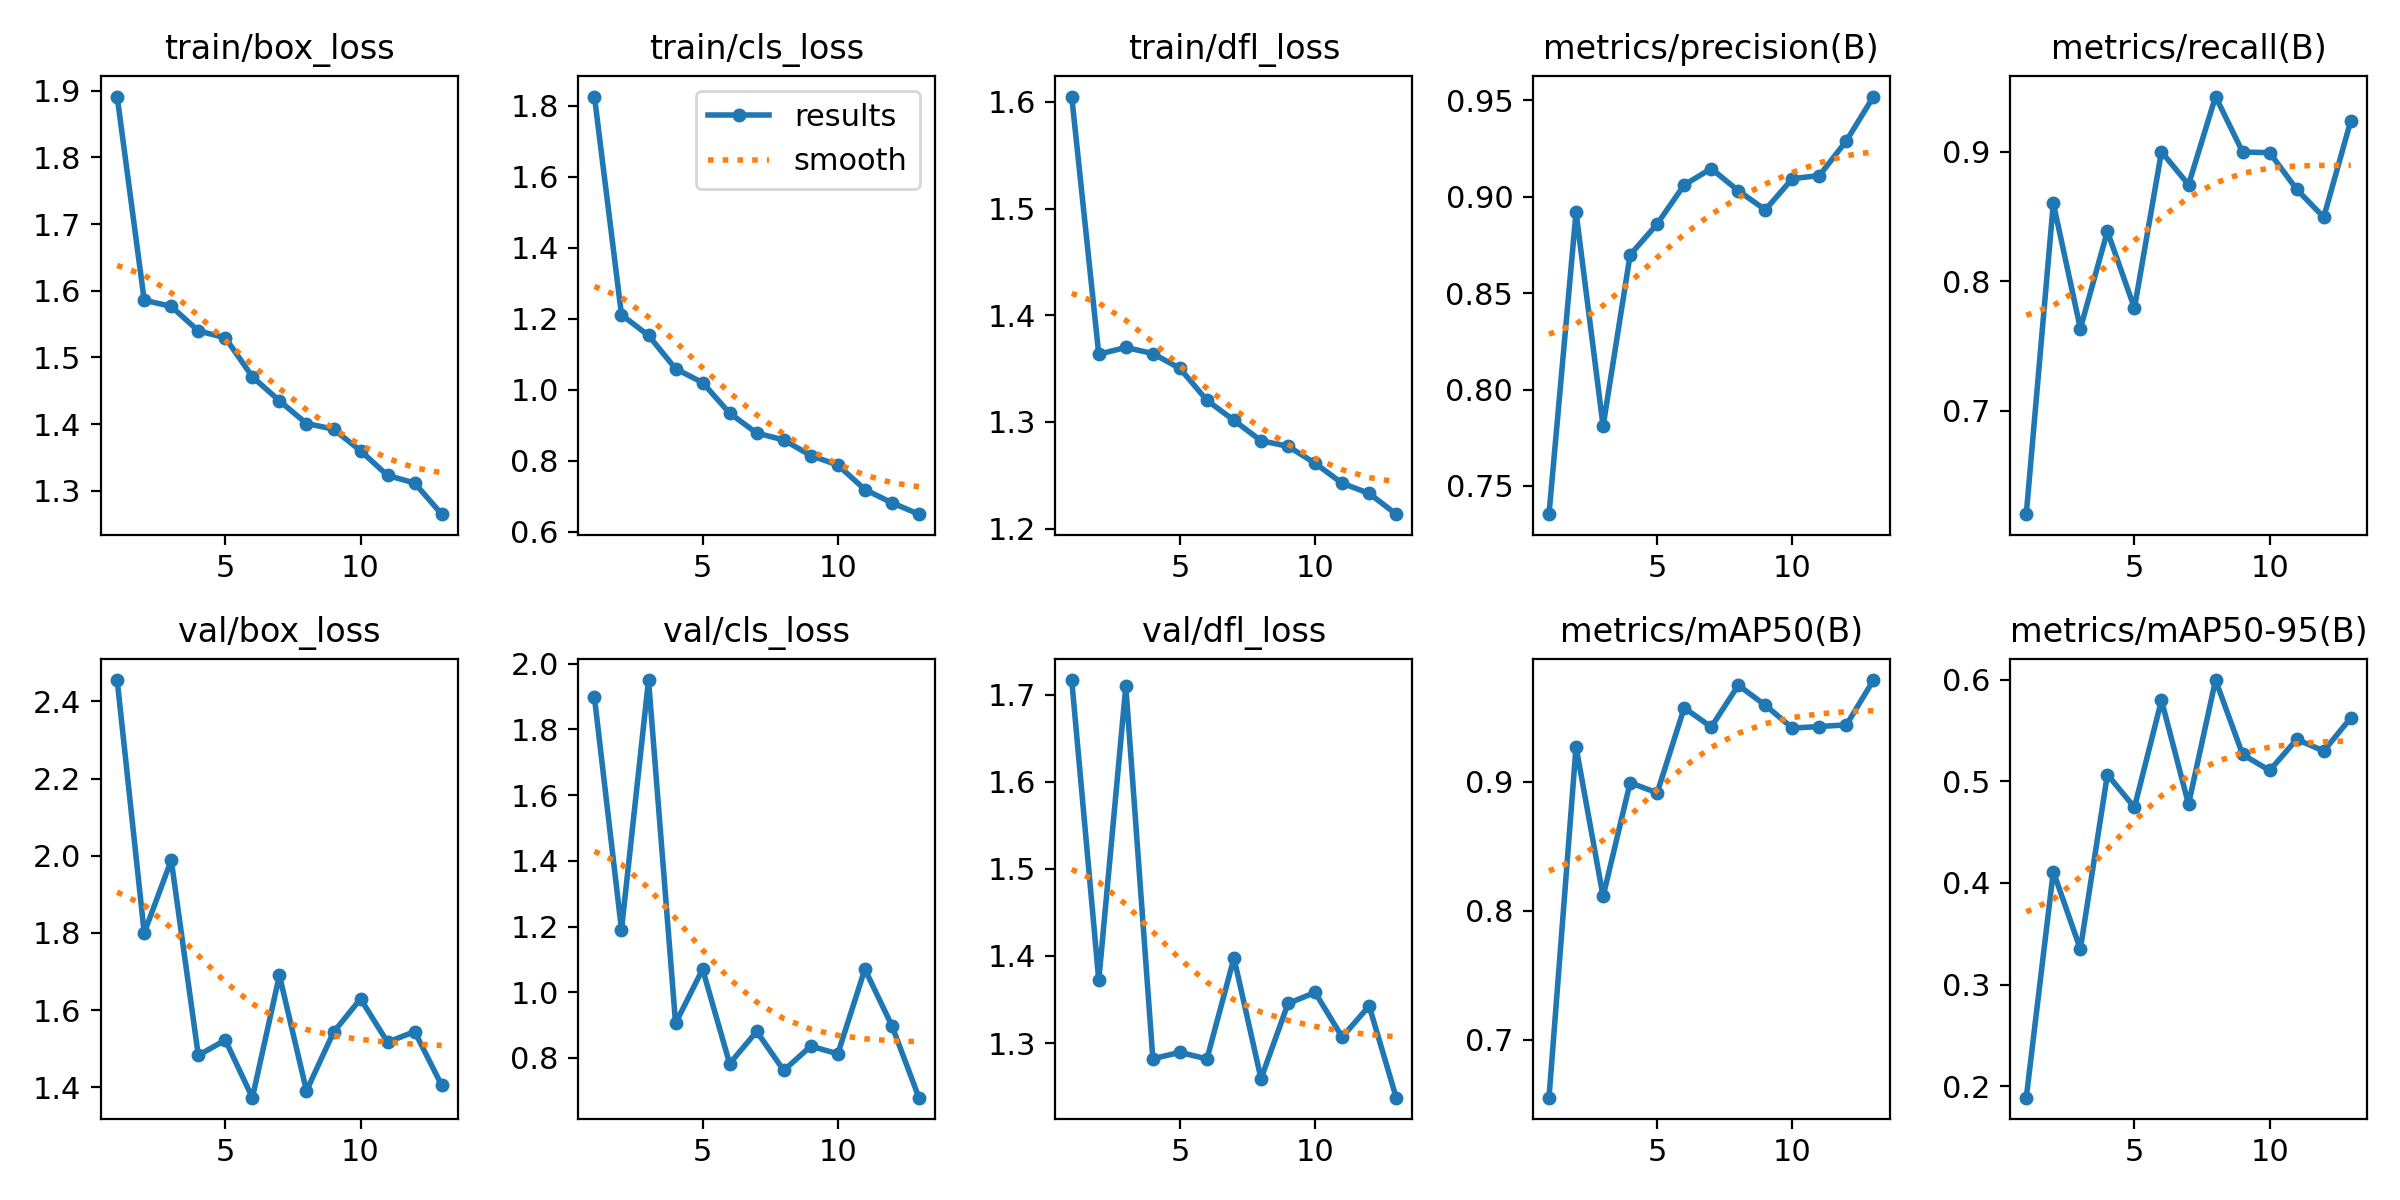

In [ ]:
Image(filename=f'runs/detect/train3/results.png', width=600)

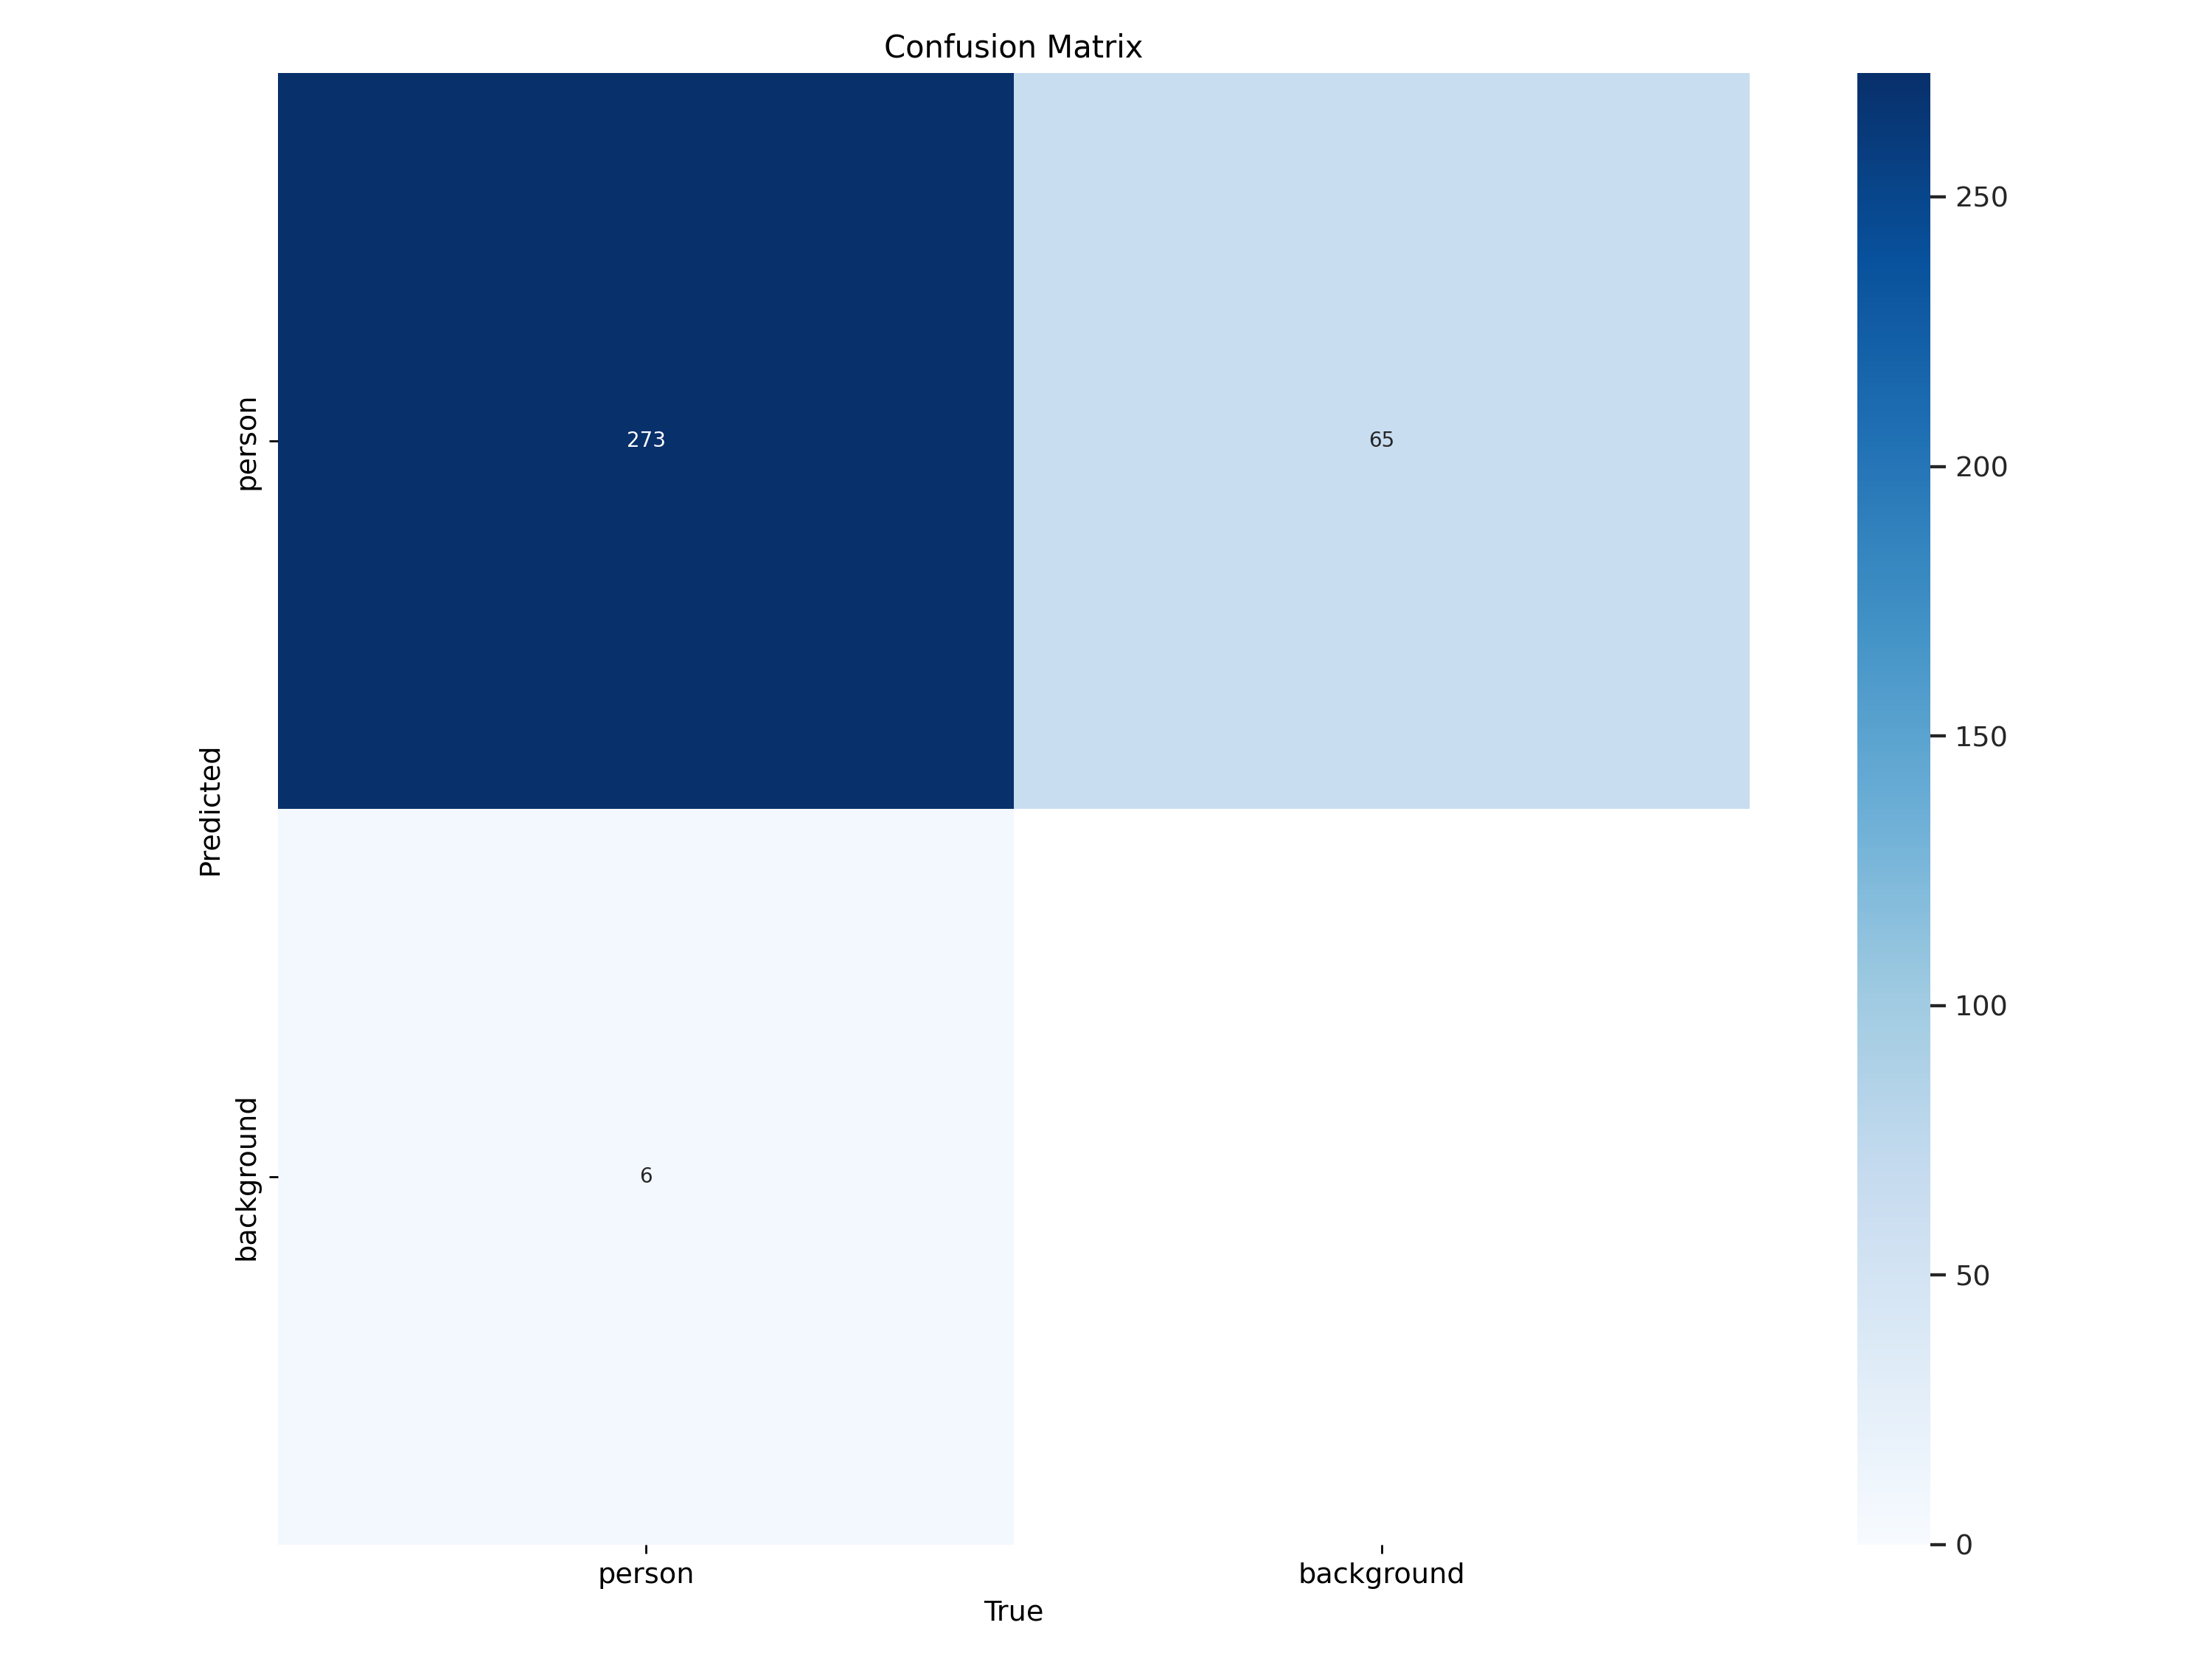

In [ ]:
Image(filename=f'runs/detect/train3/confusion_matrix.png', width=600)

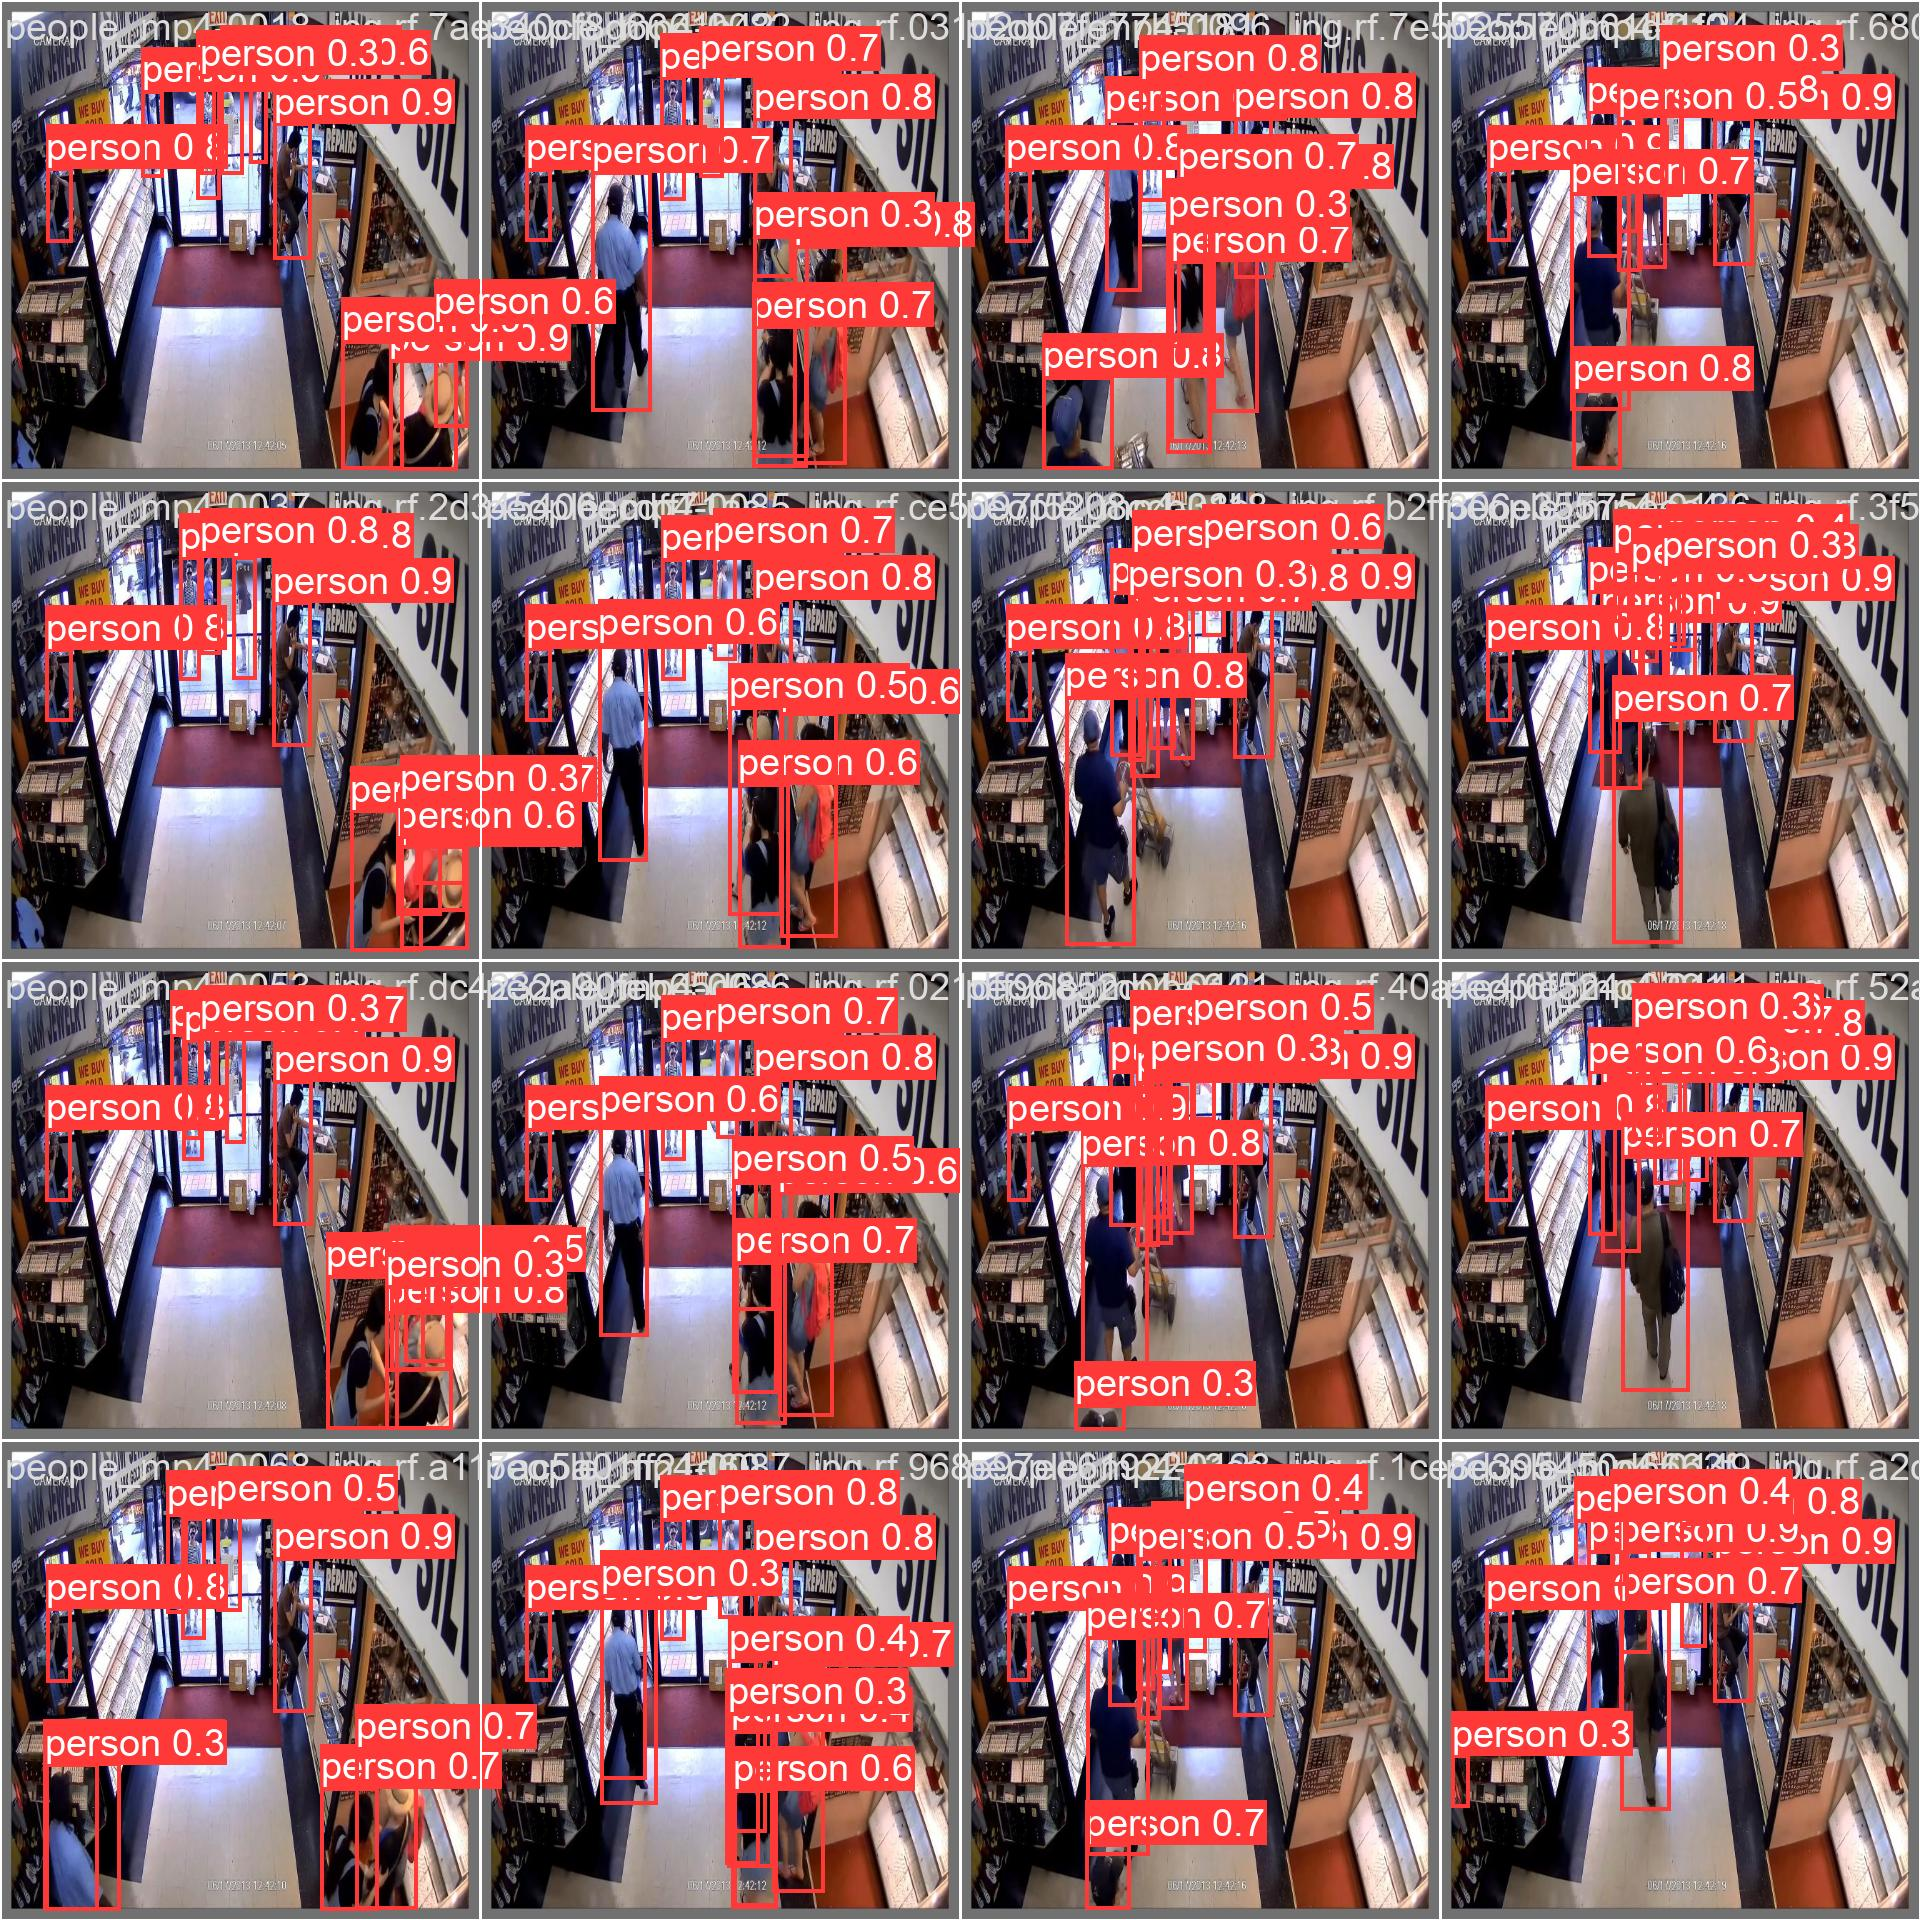

In [ ]:
Image(filename='runs/detect/train3/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}
!yolo task=detect mode=val model=/content/runs/detect/train3/weights/best.pt data=/content/datasets/data.yaml

/content
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/runs/detect/train3/weights/best.pt conf=0.25 source=/content/datasets/test/images

/content
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file